#**Health Case Study** 

**Business problems** - Business Problems merupakan tahap untuk melakukan identifikasi masalah bisnis utama yang akan pecahkan. Dalam Heart Disease Dataset, berikut Business Problems yang termasuk :  
- Memprediksi kemungkinan pasien menderita penyakit jantung  
- Memahami faktor-faktor yang berkontribusi terhadap terjadinya penyakit jantung pada pasien.
- Mengidentifikasi pasien yang berisiko tinggi terkena penyakit jantung.

---
**Metrics** - Metrics merupakan tahap untuk mendukung dalam menyelesaikan business problems yang telah ditentukan dan akan digunakan untuk memantau kinerja solusi.  Berikut Metrics yang termasuk : 
- Jumlah penderita penyakit jantung
- Usia rata-rata pasien dengan penyakit jantung
- Proporsi pasien pria dan wanita dengan penyakit jantung
- Distribusi jenis nyeri dada di antara pasien dengan penyakit jantung
- Rata-rata tekanan darah istirahat pasien dengan penyakit jantung
- Kadar kolesterol serum rata-rata pada pasien dengan penyakit jantung

---
**Goals** - Goals merupakan tahap dimana untuk menentukan tujuan dari masalah bisnis yang akan dicapai, berikut merupakan beberapa goals yang akan dicapai : 
- Mengurangi jumlah penderita penyakit jantung.
- Untuk mengidentifikasi faktor risiko penyakit jantung dan mengembangkan intervensi yang ditargetkan untuk mengelola faktor risiko tersebut.
- Untuk meningkatkan akurasi prediksi pasien mana yang berisiko tinggi terkena penyakit jantung.


---
**Attribute Information** 
- Age
- Sex
- Chest pain type (4 values)
- Resting blood pressure
- Serum cholestoral in mg/dl
- Fasting blood sugar > 120 mg/dl
- Resting electrocardiographic results (values 0,1,2)
- Maximum heart rate achieved
- Exercise induced angina
- Oldpeak = ST depression induced by exercise relative to rest
- The slope of the peak exercise ST segment
- Number of major vessels (0-3) colored by flourosopy
- Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect the names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pandas_profiling
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
!pip install dataprep
!pip install altair
!pip install featuretools
import altair as alt
!pip install pygwalker
import featuretools as ft
import datetime as dt
import pygwalker as pyg
from sklearn.cluster import KMeans
from dataprep.eda import plot, plot_correlation, plot_missing

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=fd29b99ae46a1e1aaeaedb72f92e1cebf3b4d5c083bee5

<ipython-input-1-e6fb508216d6>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.9/597.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 21.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.7/524.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##**Data Preparation**

###**Performing Feature Selection**

**Checking Correlation**

In [ ]:
correlation =  data.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
print(correlation['target']. sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [ ]:
# menghitung koefisien regresi dan konstanta
m, b = np.polyfit(data['trestbps'], data['chol'], 1) 
#Nilai m merupakan kemiringan atau gradien dari garis regresi, sedangkan nilai b merupakan perpotongan dengan sumbu y atau bias.
#Pada contoh kode di atas, nilai argumen tersebut adalah 1, yang berarti kita ingin melakukan fitting data dengan polinomial derajat 1 atau model regresi linier.

#**Hipotesis**

**Hipotesis 1 :** Fitur CP dapat mempengaruhi fitur target, dalam artian CP dapat menjadi salah satu faktor pendukung yang kuat munculnya diagnosis penyakit jantung. Pasien yang memiiki CP(Nyeri dada sedang - berat) cenderung memiliki hubungan dengan resiko penyakit jantung dibanding dengan pasien dengan tanpa nyeri hingga nyeri ringan.

**Ket** - 
CP merupakan Jenis nyeri dada yang dialami pasien (0 = tanpa nyeri, 1 = nyeri ringan, 2 = nyeri sedang, 3 = nyeri berat)

Berdasarkan ahsil korelasi dibawah ini, fitur CP ke Target memiliki korelasi sedang positif, sehingga ini menjadi salah satu bukti kuat bahwa fitur berhubungan dengan resiko penyakit jantung


In [ ]:
# Menghitung korelasi antara kedua variabel
r = np.corrcoef(data['cp'], data['target'])[0, 1]
print(r)

0.4348542500527374


**Hipotesis 2 :** 

H0 : Jenis kelamin [sex] cenderung signifikan tidak terkena resiko penyakit jantung. Dalam Kasus ini diambil hipotesis dimana Wanita memiliki risiko lebih tinggi terkena penyakit jantung dibandingkan pria.

H1 : Jenis kelamin [sex] cenderung signifikan sebagai salah satu faktor penyebab terkena resiko penyakit jantung. Dalam Kasus ini diambil hipotesis dimana Wanita memiliki risiko lebih rendah terkena penyakit jantung dibandingkan pria.

*Variabel independen*: sex

*Variabel dependen*: risiko penyakit jantung [Target]

Analisis hubungan

In [ ]:
# Filter data for male and female
male_data = data.loc[data["sex"] == 1, "target"]
female_data = data.loc[data["sex"] == 0, "target"]

In [ ]:
# Filter data for male and female
male_mean = male_data.mean()
male_std = male_data.std()
female_mean = female_data.mean()
female_std = female_data.std()

In [ ]:
# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(male_data, female_data)


In [ ]:
print("Male Mean: {:.2f}, Standard Deviation: {:.2f}".format(male_mean, male_std))
print("Female Mean: {:.2f}, Standard Deviation: {:.2f}".format(female_mean, female_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))

Male Mean: 0.42, Standard Deviation: 0.49
Female Mean: 0.72, Standard Deviation: 0.45
T-Statistic: -9.31, P-Value: 0.0000


In [ ]:
# Check hypothesis
if p_value < 0.05:
    print("Hypothesis H1 accepted")
else:
    print("Hypothesis H0 rejected")

Hypothesis H1 accepted


Hipotesis diterima, maka artinya hasil analisis statistik menunjukkan bahwa terdapat perbedaan yang signifikan antara fitur **sex** ke **target**. 

**Hipotesis 3**  

H0: Tidak ada hubungan yang signifikan antara usia dan risiko terkena penyakit jantung pada populasi yang diwakili oleh dataset ini.

H1: Terdapat hubungan yang signifikan antara usia dan risiko terkena penyakit jantung pada populasi yang diwakili oleh dataset ini.


Analisis hubungan

In [ ]:
# Prepare data for analysis
disease_yes = data[data['target']==1]['age']
disease_no = data[data['target']==0]['age']

In [ ]:
# Filter data for disease_yes and disease_no
disease_yes_mean = disease_yes.mean()
disease_yes_std = disease_yes.std()
disease_no_mean = disease_no.mean()
disease_no_std = disease_no.std()

In [ ]:
# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(disease_yes, disease_no)

In [ ]:
print("disease_yes: {:.2f}, Standard Deviation: {:.2f}".format(disease_yes_mean, disease_yes_std))
print("disease_no: {:.2f}, Standard Deviation: {:.2f}".format(disease_no_mean, disease_no_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))

disease_yes: 52.41, Standard Deviation: 9.63
disease_no: 56.57, Standard Deviation: 7.91
T-Statistic: -7.54, P-Value: 0.0000


In [ ]:
# Check hypothesis
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


Dapat disimpulkan bahwa H1 diterima sehingga terdapat hubungan yang signifikan antara usia dan risiko terkena penyakit jantung pada populasi yang diwakili oleh dataset ini.

**Hipotesis 4**

H0 : Tekanan darah [trestbps] tidak memiliki hubungan yang kompleks dengan risiko penyakit jantung [target].

H1 : Tekanan darah [trestbps] memiliki hubungan yang kompleks dengan risiko penyakit jantung [target]. Misalnya, hipertensi (tekanan darah tinggi) dapat meningkatkan risiko penyakit jantung, tetapi tekanan darah rendah juga dapat menjadi faktor risiko jika terlalu rendah.

Analisis hubungan

In [ ]:
# Prepare data for analysis
trestbps_yes = data[data['target']==1]['trestbps']
trestbps_no = data[data['target']==0]['trestbps']

In [ ]:
# Filter data for disease_yes and disease_no
trestbps_mean = trestbps_yes.mean()
trestbps_std = trestbps_yes.std()
trestbps_no_mean = trestbps_no.mean()
trestbps_yes_std = trestbps_no.std()

In [ ]:
# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(trestbps_yes, trestbps_no)

In [ ]:
print("trestbps_yes: {:.2f}, Standard Deviation: {:.2f}".format(trestbps_mean, trestbps_std))
print("trestbps_no: {:.2f}, Standard Deviation: {:.2f}".format(trestbps_no_mean, trestbps_yes_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))

trestbps_yes: 129.25, Standard Deviation: 16.11
trestbps_no: 134.11, Standard Deviation: 18.58
T-Statistic: -4.48, P-Value: 0.0000


In [ ]:
# Check hypothesis
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


##**Model**

***2 model yang digunakan***

*Random Forest Models* -  Random forest adalah Algoritma Supervised Machine Learning yang digunakan secara luas dalam masalah Klasifikasi dan Regresi. Model ini dapat mengatasi masalah overfitting, memperbaiki akurasi prediksi dengan mengkombinasikan beberapa decision tree, dan performanya baik meskipun data berisi nilai null/hilang.

*Decision Trees Models* - Alasan memilih model ini dikarenakan model ini Mudah diinterpretasikan, fleksibel, dan dapat menangani data yang berbeda-beda jenisnya, baik data kategorikal maupun data kontinu.

why you think it would be beneficial for you to choose the model for the dataset?

Model ini dapat memberikan hasil prediksi yang akurat dan dapat membantu dalam pengambilan keputusan. Dengan model yang tepat dapat membantu dalam memahami hubungan antara variabel input dan output, dan dapat membantu dalam menemukan pola atau tren dalam data. Selain itu, dengan menggunakan model ini dapat mengurangi biaya dan waktu yang diperlukan untuk training model. Dengan memilih model yang tepat, dapat meningkatkan efisiensi dan efektivitas dalam analisis data.


##**Cross Validation and Bootstrapping**

*Cross Validation* - Cross Validation digunakan untuk mengevaluasi knerja model dengan membagi data menjadi beberapa bagian dan menggunakannya untuk training dan testing model.

*Bootstrapping* - Bootstrapping merupakan metode untuk mengukur kinerja model dengan cara membuat sampel ulang dari dataset asli dan menggunakannya untuk melatih dan menguji model.



**Cross Validation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Now let's use 5-fold cross-validation to evaluate the model performance
from sklearn.model_selection import cross_val_score

In [ ]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier()

In [ ]:
#Pisahkan variabel Independen sebagai X dan Dependen sebagai y!
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 1.00 with standard deviation 0.00


**Bootstrapping**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Definisikan model awal
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Tentukan jumlah iterasi bootstraping
n_iter = 100
accuracies = []

In [ ]:
# Inisialisasi array untuk menyimpan hasil kinerja model dari setiap sampel
accuracy_scores = np.zeros(n_iter)

In [ ]:
# Lakukan bootstrapping sebanyak n_iter kali
for i in range(n_iter):
    # Ambil sampel acak sebanyak jumlah data latih yang tersedia dengan pengembalian
    sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    X_sample = X_train.loc[sample_indices]
    y_sample = y_train.loc[sample_indices]
    
    # Latih model pada sampel yang diambil
    model.fit(X_sample, y_sample)
    
    # Evaluate the model on the entire dataset
    accuracy = model.score(X, y)
    accuracies.append(accuracy)

In [ ]:
# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

In [ ]:
# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.97
95% confidence interval: [0.96, 0.99]


In [ ]:
# Gunakan model akhir yang sudah di-bootstrapping untuk melakukan prediksi pada data uji
y_pred = model.predict(X_test)


In [ ]:
# Evaluasi kinerja model pada data uji
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy score: {accuracy:.3f}")

Test accuracy score: 0.946


#**Create at least 2 models**

*Decision Tree* - Decision Tree adalah algoritma pembelajaran yang menghasilkan model berupa struktur pohon yang menggambarkan hubungan antara fitur pada data input dan label kelas pada data output. Decision Tree cenderung rentan tterhadap overfitting, yaitu kondisi di mana model terlalu kompleks dan terlalu menyesuaikan diri pada data latih, sehingga kinerjanya menurun saat diterapkan pada data uji.

*Random Forest* - Random Forest adalah sebuah ensambel dari beberapa Decision Tree yang dibangun secara acak pada subset data input dan menggunakan subset fitur secara acak juga. Random Forest mengurangi risiko overfitting dengan menggunakan beberapa pohon yang dibangun secara acak pada subset data dan fitur secara acak.


**Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Definisikan model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(820, 13)
(820,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(205, 13)
(205,)


In [ ]:
# Latih model Decision Tree pada data latih
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Gunakan model Decision Tree untuk melakukan prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', 
random_state = 10, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

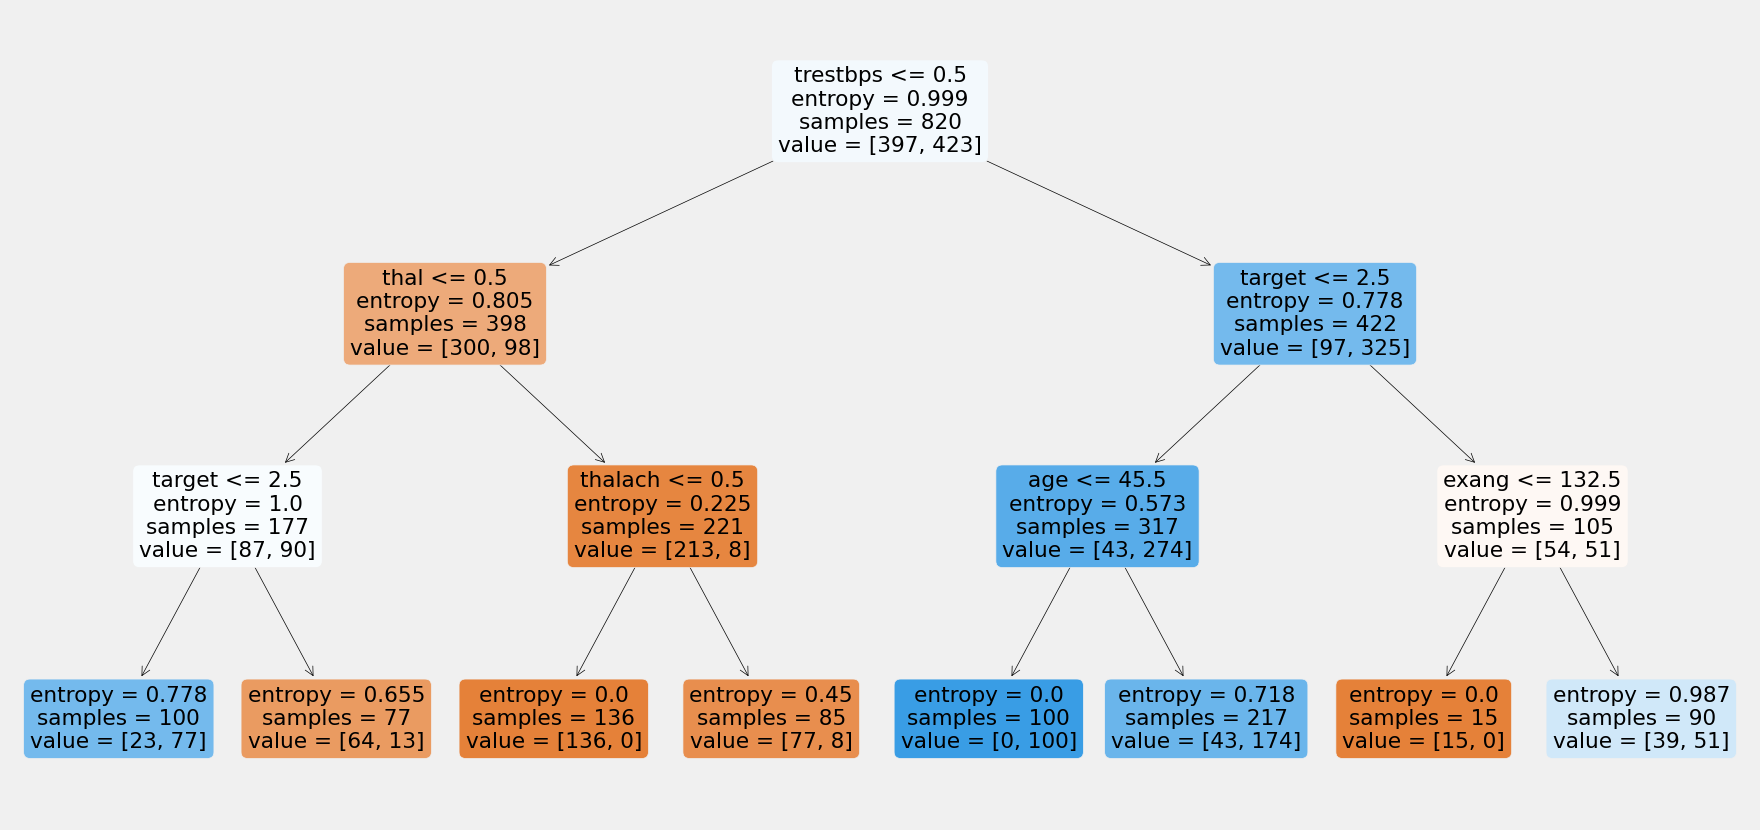

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, rounded=True, feature_names=data.drop('sex', axis=1).columns)
plt.show()

In [ ]:
# Evaluasi kinerja model Decision Tree pada data uji
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy score: {accuracy_dt:.3f}")

Decision Tree accuracy score: 0.985


**Random Forest**

In [ ]:
# Definisikan model Random Forest
rf_model = RandomForestClassifier(n_estimators=5, max_depth = 4)


In [ ]:
# Latih model Random Forest pada data latih
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=3,
                             random_state=10)

In [ ]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred_rf = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1165313289)


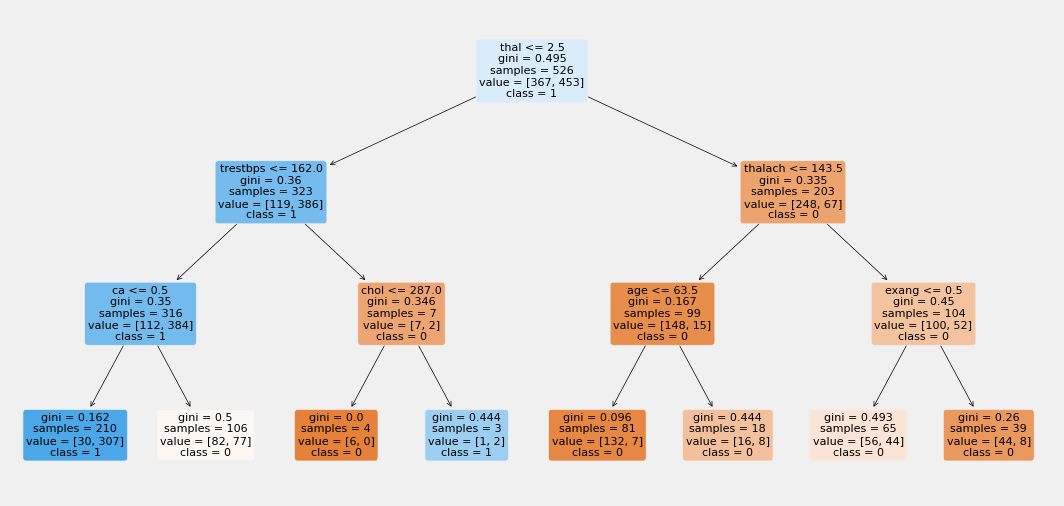

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1283169405)


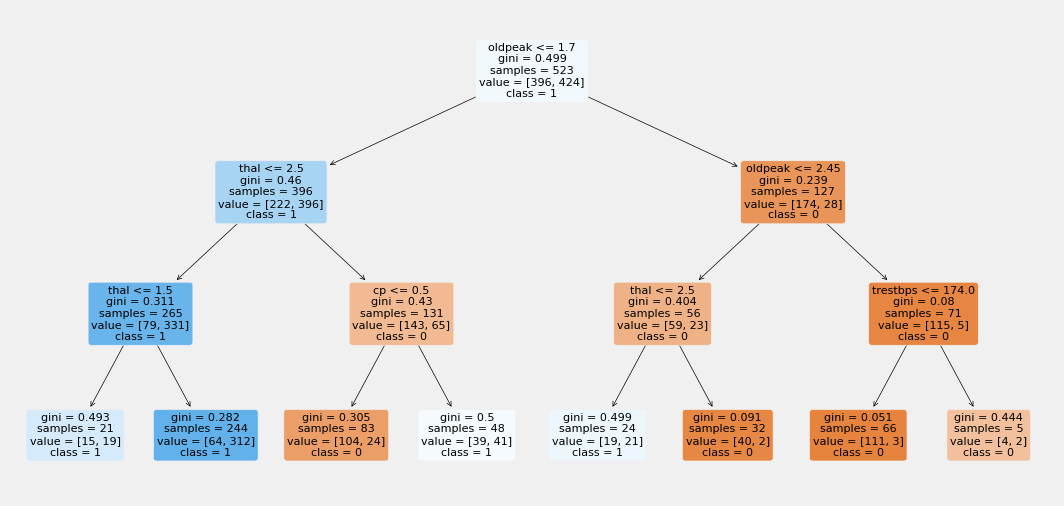

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=89128932)


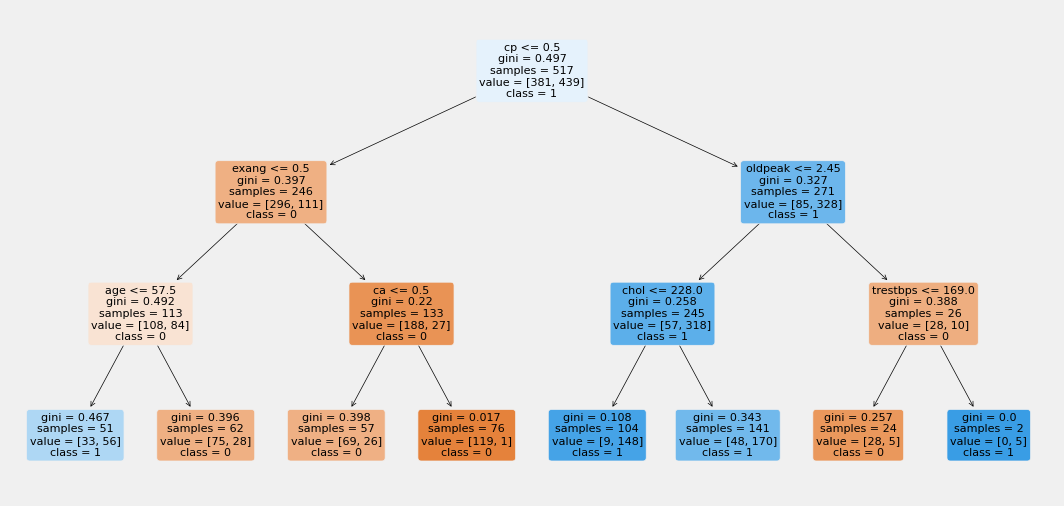

In [ ]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [ ]:
# Evaluasi kinerja model Random Forest pada data uji
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy score: {accuracy_rf:.3f}")

Random Forest accuracy score: 0.946


##**Daftar Evaluasi Model**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       102
           1       0.77      0.92      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



Berdasarkan hasil evaluasi, terdapat 3 metrik yang di evaluasi yaitu precision, recall, dan f1-score. Berikut justifikasi dari setiap metrik diatas : 

**Precision** - Precision adalah rasio antara jumlah benar positif (true positive) dengan total prediksi positif. Terdapat precision pada kelas 0 sebesar 0.90, sedangkan untuk kelas 1 sebesar 0.78. Precision yang tinggi menunjukkan bahwa model mampu memprediksi dengan benar keadaan positif (terjangkit penyakit jantung) dari keseluruhan prediksi positif yang dilakukan. Namun, precision yang lebih rendah pada kelas 1 menunjukkan bahwa model memiliki kecenderungan untuk membuat kesalahan positif (memprediksi seseorang terjangkit penyakit padahal sebenarnya tidak).

**Recall** - Recall (sensitivitas) merupakan rasio antara prediksi yang benar positif dengan total data yang sebenarnya positif. Hasil recall untuk kelas 0 adalah 0.74, sedangkan untuk kelas 1 adalah 0.92. Recall yang tinggi menunjukkan bahwa model mampu mendeteksi keadaan positif (terjangkit penyakit) dari seluruh data yang sebenarnya positif. Namun, recall yang lebih rendah pada kelas 0 menunjukkan bahwa model memiliki kecenderungan untuk melewatkan kasus positif (tidak mendeteksi seseorang terjangkit penyakit padahal sebenarnya positif).

**f1-score** - F1-score merupakan gabungan dari precision dan recall. Hasil F1-score untuk kelas 0 adalah 0.81, sedangkan untuk kelas 1 adalah 0.84. F1-score yang tinggi menunjukkan bahwa model mampu memperoleh keseimbangan antara precision dan recall.

Dapat disimpulkan bahwa model memiliki performa yang cukup baik.

In [ ]:
# Evaluate the model using accuracy, precision, recall and F1 scores 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
f1

0.9458128078817734

**Evaluasi model yang telah dibuat**

In [ ]:
# Evaluasi kinerja model Decision Tree pada data uji
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {accuracy_dt:.3f}")

Accuracy score: 0.985


##**Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
print(f"""R^2 Training Score: {rf.score(X_train, y_train):.2f}
OOB Score: {rf.oob_score_:.2f}
R^2 Validation Score: {rf.score(X_test, y_test):.2f}""")

R^2 Training Score: 0.99
OOB Score: 0.95
R^2 Validation Score: 0.94


In [ ]:
#I define a few helper functions to make analysis more convenient and presentable.
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,cp,0.227494
1,thal,0.164424
2,ca,0.140246
3,oldpeak,0.103663
4,chol,0.084014
5,thalach,0.074856
6,age,0.071283
7,trestbps,0.054794
8,slope,0.031755
9,sex,0.016604


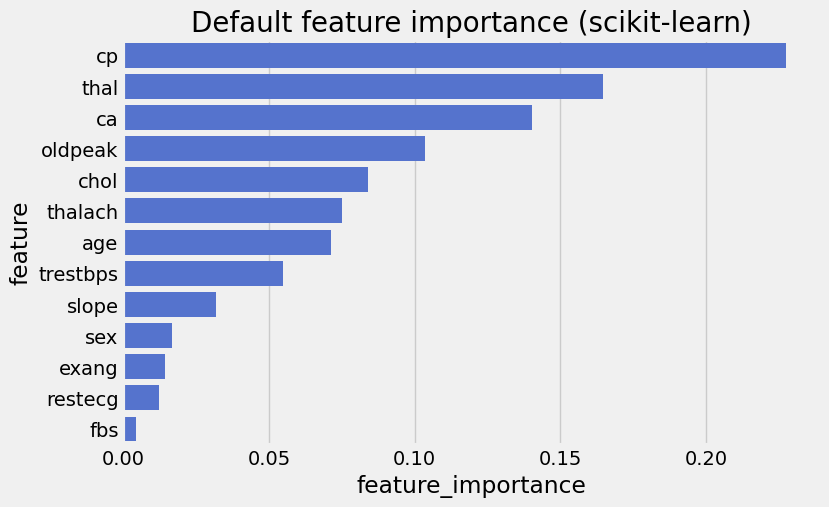

In [ ]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

Dapat disimpulkan bahwa fitur terpenting teratas adalah cp, ca, thal.

#LightGBM

In [ ]:
import lightgbm as lgb
import xgboost as xgb

In [ ]:
# Define the features and target
X = data.drop(['target'],axis=1)
y = data[['target']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', metric='auc', learning_rate=0.001, num_boost_round=1000)
lgb_model.fit(X=X_train, y=y_train)
# calculating the probabilities
y_pred_proba = lgb_model.predict_proba(X_test)
# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)
# printing the test accuracy
print("The test accuracy score of LightGBM Classifier is ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
The test accuracy score of LightGBM Classifier is  0.8780487804878049


In [ ]:
# Show the classification report
y_true = y_test
y_pred = lgb_model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       102
           1       0.85      0.91      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



#**Assignment #4**

##**Hyperparameter Tuning**

Kita akan melakukan Hyperparameter Tuning, untuk mencari nilai optimal dari parameter-parameter yang mempengaruhi performa model machine learning yang telah dibuat diatas

**Decision Tree**

In [ ]:
# Create model Decision Tree
new_dt_model = DecisionTreeClassifier(max_depth = 4)

# Fit Decision Tree
new_dt_model.fit(X_train, y_train)
# Predict the test set labels
new_dt_pred = new_dt_model.predict(X_test)

# cetak akurasi
dt = accuracy_score(y_test, new_dt_pred)
print("Accuracy of Decision Tree:", dt.round(2))

Accuracy of Decision Tree: 0.8


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [2, 4, 6, 8], 
              'min_samples_leaf': [2, 4, 6, 8], 
              'min_samples_split': [2, 4, 6, 8]}

new_dt_model = DecisionTreeClassifier(max_depth = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=new_dt_model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(data.drop('target', axis=1), data['target'])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
# Print best parameter after tuning 
print('Best parameters after tuning: ', grid_search.best_params_)

# Print best score after tuning 
print('Best score after tuning: ', grid_search.best_score_)

Best parameters after tuning:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score after tuning:  0.968780487804878


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
print(classification_report(y_test, new_dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



**Random Forest**

In [ ]:
# Create model Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc_new = RandomForestClassifier(n_estimators = 5, max_depth = 4)


# Fit RandomForestClassifier
rfc_new.fit(X_train, y_train)
# Predict the test set labels
rfc_new_pred = rfc_new.predict(X_test)

# cetak akurasi [27]
rfc_new_acc = accuracy_score(y_test, rfc_new_pred)
print("Accuracy of Random Forest:", rfc_new_acc.round(2))

Accuracy of Random Forest: 0.86


<ipython-input-76-7397cfacd338>:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [2, 4, 6, 8], 
              'min_samples_leaf': [2, 4, 6, 8], 
              'min_samples_split': [2, 4, 6, 8]}

rfc_new = RandomForestClassifier(n_estimators=4, 
                             max_depth=4,
                             random_state=10)

# Instantiate the grid search model
grid_search_rfc = GridSearchCV(estimator=rfc_new, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search_rfc.fit(data.drop('target', axis=1), data['target'])

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=4,
                                              random_state=10),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
# Print best parameter after tuning 
print('Best parameters after tuning: ', grid_search_rfc.best_params_)

# Print best score after tuning 
print('Best score after tuning: ', grid_search_rfc.best_score_)

Best parameters after tuning:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score after tuning:  0.9521951219512195


In [ ]:
print(classification_report(y_test, rfc_new_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       102
           1       0.83      0.92      0.87       103

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



###**Validation Model**

Memprediksi seberapa baik model diatas dalam kumpulan data pengujian setelah dilakukan Hyperparameter Tuning

**Cross Validation**

In [ ]:
#Cross validation model Decision Tree
scores = cross_val_score(new_dt_model, X, y, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 0.83 with standard deviation 0.02


In [ ]:
#Cross validation model Random Forest
scores = cross_val_score(rfc_new, X, y, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy with cross-validation: 0.88 with standard deviation 0.03


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Setelah melalui proses Cross Validation nilai Cross Validation pada model Decision Tree dan Random Forest sama-sama diatas 0.80, dan ini merupakan hasil yang baik dan memgklaim bahwa model ini memiliki kinerja yang baik dalam memprediksi hubungan antara fitur-fitur yang telah ditentukan pada hipotesis ke fitur target atau fitur-fitur tersebut memiliki dampak ke resiko penyakit jantung

**Bootstrapping**

In [ ]:
# Tentukan jumlah iterasi bootstraping
n_iter = 100
accuracies = []

# Inisialisasi array untuk menyimpan hasil kinerja model dari setiap sampel
accuracy_scores = np.zeros(n_iter)

# Lakukan bootstrapping sebanyak n_iter kali
for i in range(n_iter):
    # Ambil sampel acak sebanyak jumlah data latih yang tersedia dengan pengembalian
    sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    X_sample = X_train.loc[sample_indices]
    y_sample = y_train.loc[sample_indices]
    
    # Latih model pada sampel yang diambil
    rfc_new.fit(X_sample, y_sample)
    
    # Evaluate the model on the entire dataset
    accuracy = rfc_new.score(X, y)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

##**Model Performance Analytics**

**Model Validation Stability**

Pada tahap ini, kita akan melihat stabilitas model yang baru. Model Validation Stability dilakukan dengan menggunakan metode K-Fold Cross Validation (CV). K-Fold CV mengambil sejumlah data dari dataset untuk dijadikan validation set, kemudian mengulanginya sebanyak K kali untuk memastikan setiap data telah digunakan sebagai validation set.

In [ ]:
# Stabilitas validasi model decision tree sesudah tuning
from sklearn.model_selection import KFold, cross_val_score

# Define K-Fold CV object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using K-Fold CV
scores = cross_val_score(new_dt_model, X, y, scoring='neg_mean_squared_error', cv=kfold)

# Print results
print(f'Scores: {scores}')
print(f'Mean: {np.mean(scores)}')
print(f'Standard deviation: {np.std(scores)}')

Scores: [-0.2        -0.11219512 -0.14146341 -0.10731707 -0.1804878 ]
Mean: -0.14829268292682926
Standard deviation: 0.03671197604336933


Model memiliki skor negatif rata-rata yang relatif kecil dan standar deviasi yang cukup kecil, yang menunjukkan bahwa model cukup baik dalam melakukan prediksi dan hasil evaluasi model pada setiap fold cukup stabil.

In [ ]:
# Stabilitas validasi model Random Forest sesudah tuning
from sklearn.model_selection import KFold, cross_val_score

# Define K-Fold CV object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using K-Fold CV
scores = cross_val_score(rfc_new, X, y, scoring='neg_mean_squared_error', cv=kfold)

# Print results
print(f'Scores: {scores}')
print(f'Mean: {np.mean(scores)}')
print(f'Standard deviation: {np.std(scores)}')

Scores: [-0.15121951 -0.10243902 -0.11219512 -0.09756098 -0.12682927]
Mean: -0.11804878048780487
Standard deviation: 0.019365300723199225


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/s

Berdasarkan hasil Model Validation Stability yang dilakukan menggunakan K-Fold CV, diperoleh nilai skor negatif rata-rata sebesar -0.118 dengan standar deviasi sebesar 0.019. Skor negatif rata-rata yang relatif kecil menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan prediksi, sementara standar deviasi yang kecil menunjukkan bahwa evaluasi model pada setiap fold cukup stabil.

##**Learning Curves**

**Decision Tree**

In [ ]:
# impor library tambahan [31]
from yellowbrick.model_selection import learning_curve

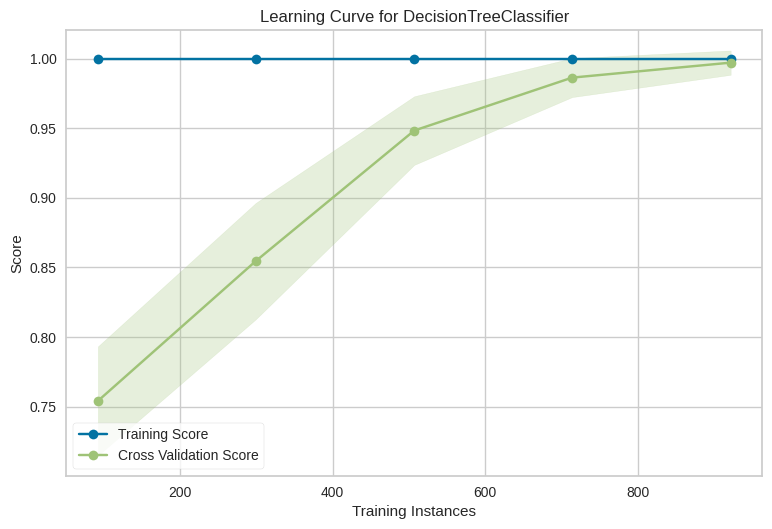

In [ ]:
# learning curve untuk model decision tree sebelum dilakukan Hyperparameter Tuning
try:
  learning_curve(dt_model,
                X,
                y,
                cv = 10,
                scoring = 'accuracy')
except:
  pass

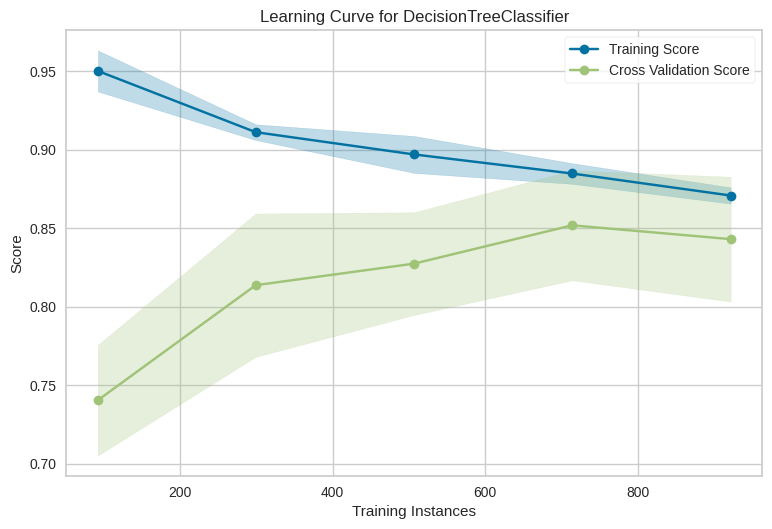

In [ ]:
# learning curve untuk model decision tree setelah dilakukan Hyperparameter Tuning
try:
  learning_curve(new_dt_model,
                X,
                y,
                cv = 10,
                scoring = 'accuracy')
except:
  pass

**Random Forest**

Learning curve untuk model Random Forest sebelum dilakukan Hyperparameter Tuning

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
rf_model.fit(X_train, y_train)

<ipython-input-136-ce45b449cc1f>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [ ]:
#Define metrics
y_pred_proba_rf = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba) #untuk menghitung AUC - Semakin dekat AUC ke 1 (ke nilai 1), semakin baik modelnya.
#Model dengan AUC sama dengan 0,5 tidak lebih baik dan dapat ditegaskan bahwa model melakukan pekerjaan yang baruk dalam mengklasifikasikan data


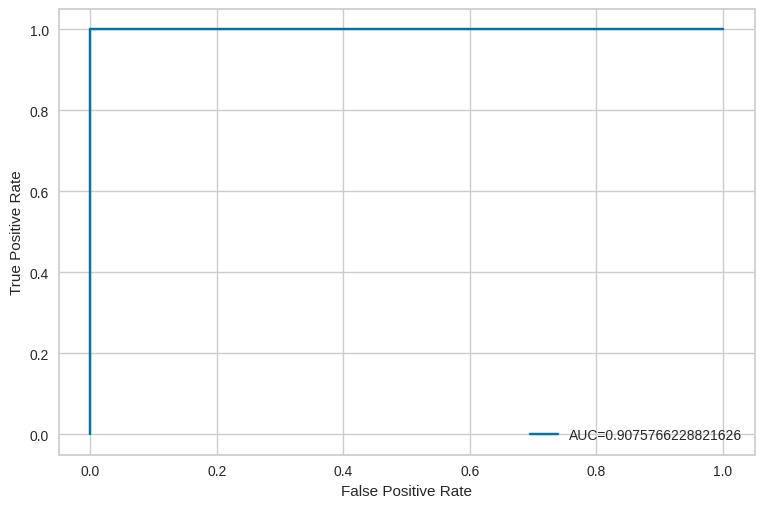

In [ ]:
#create ROC curve and Value of AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Learning curve untuk model Random Forest setelah dilakukan Hyperparameter Tuning

In [ ]:
rfc_new.fit(X_train, y_train)

<ipython-input-132-c8b143f2b396>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=4, n_estimators=5)

In [ ]:
#Define metrics
y_pred_proba = rfc_new.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _= metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba) #untuk menghitung AUC - Semakin dekat AUC ke 1 (ke nilai 1), semakin baik modelnya.
#Model dengan AUC sama dengan 0,5 tidak lebih baik dan dapat ditegaskan bahwa model melakukan pekerjaan yang baruk dalam mengklasifikasikan data


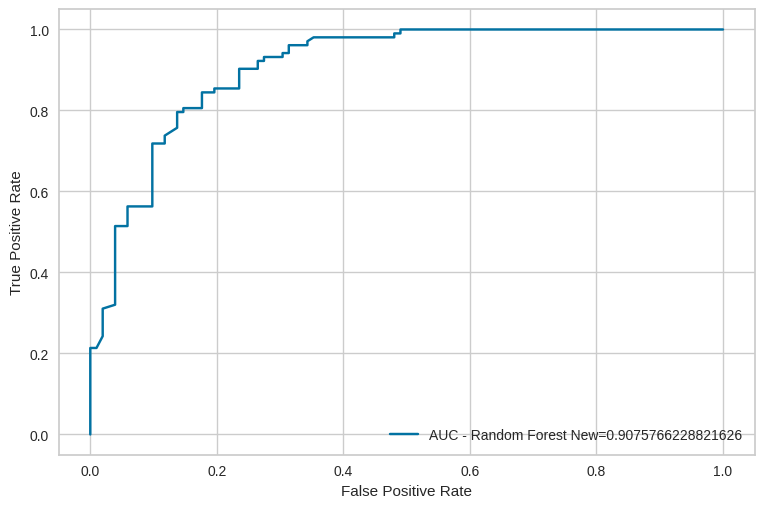

In [ ]:
#create ROC curve and Value of AUC
plt.plot(fpr_rf,tpr_rf,label="AUC - Random Forest New="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Analisis ROC :**
Pada grafik learning curve di atas, kedua model yang telah melalui Hyperparameter Tuning memiliki akurasi training dan validasi yang mirip. Semuanya sama-sama berada di rentang 0.8 sampai 0.90, menunjukkan bahwa model memiliki performa yang baik atau "good fit".

##**Confusion Matrix**

**Decision Tree**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


Text(0.5, 1.0, 'Confusion Matrix untuk Decision Tree Baru')

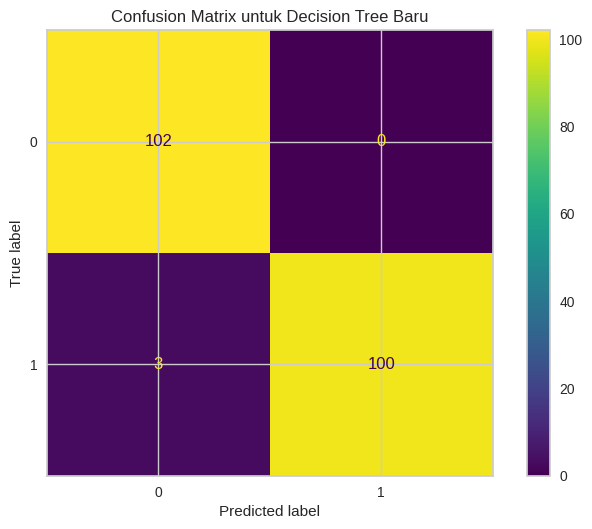

In [ ]:
# visualisasi confusion matrix untuk model decision tree sebelum melalui Hyperparameter Tuning
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

new_dt_cm = confusion_matrix(y_test, y_pred_dt, labels=np.unique(y_test))
ConfusionMatrixDisplay(confusion_matrix=new_dt_cm, display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix untuk Decision Tree Baru')
     

Text(0.5, 1.0, 'Confusion Matrix untuk Decision Tree Baru')

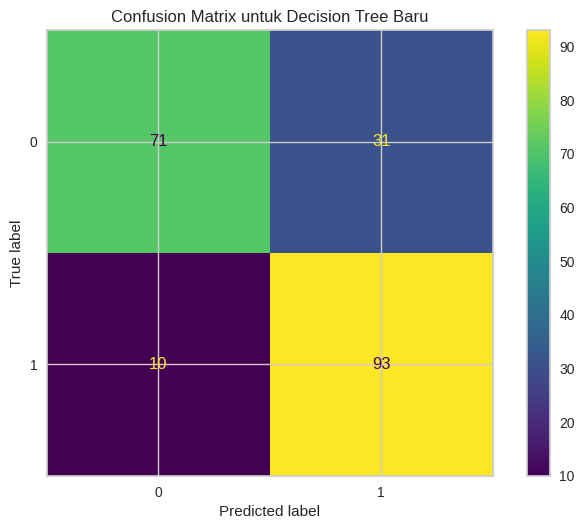

In [ ]:
# visualisasi confusion matrix untuk model decision tree setelah melalui Hyperparameter Tuning
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

new_dt_cm = confusion_matrix(y_test, new_dt_pred, labels=np.unique(y_test))
ConfusionMatrixDisplay(confusion_matrix=new_dt_cm, display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix untuk Decision Tree setelah melalui Hyperparameter tuning')


**Random Forest**

Text(0.5, 1.0, 'Confusion Matrix untuk Random Forest sebelum melalui Hyperparameter Tuning')

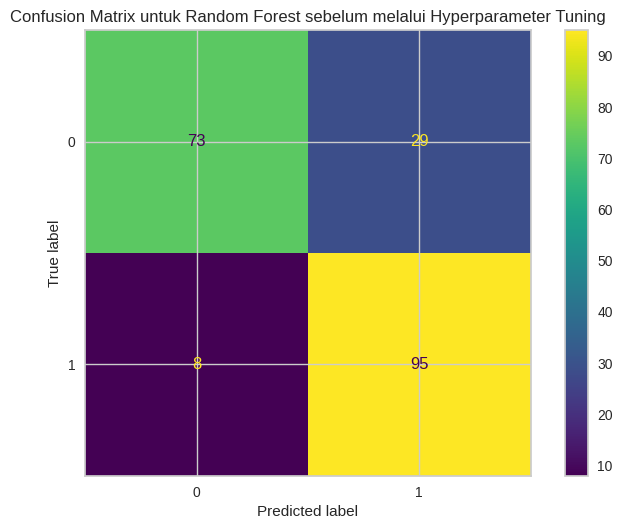

In [ ]:
# visualisasi confusion matrix untuk model Random Forest sebelum melalui Hyperparameter Tuning
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

new_dt_cm = confusion_matrix(y_test, y_pred_rf, labels=np.unique(y_test))
ConfusionMatrixDisplay(confusion_matrix=new_dt_cm, display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix untuk Random Forest sebelum melalui Hyperparameter Tuning')

Text(0.5, 1.0, 'Confusion Matrix untuk Random Forest setelah melalui Hyperparameter Tuning')

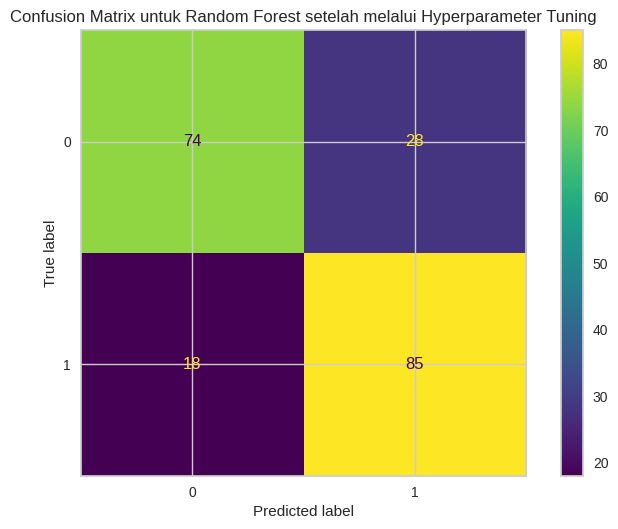

In [ ]:
# visualisasi confusion matrix untuk model Random Forest setelah melalui Hyperparameter Tuning
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

new_dt_cm = confusion_matrix(y_test, rfc_new_pred, labels=np.unique(y_test))
ConfusionMatrixDisplay(confusion_matrix=new_dt_cm, display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix untuk Random Forest setelah melalui Hyperparameter Tuning')

##**ROC - AUC Curve**

In [ ]:
new_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

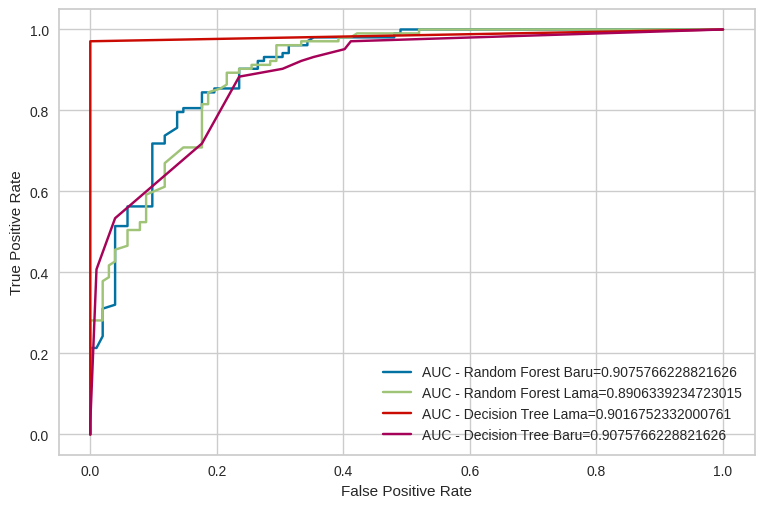

In [ ]:
# Define metrics
y_pred_proba_rf = dt_model.predict_proba(X_test)[::,1]
fpr_dt, tpr_dt, _= metrics.roc_curve(y_test,  y_pred_proba_rf)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)


# Define metrics
y_pred_proba_rf = new_dt_model.predict_proba(X_test)[::,1]
fpr_new_dt, tpr_new_dt, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_rf) 
# Define metrics
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr,tpr, _= metrics.roc_curve(y_test,  y_pred_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba) #untuk menghitung AUC - Semakin dekat AUC ke 1 (ke nilai 1), semakin baik modelnya.
#Model dengan AUC sama dengan 0,5 tidak lebih baik dan dapat ditegaskan bahwa model melakukan pekerjaan yang baruk dalam mengklasifikasikan data

# Define metrics
y_pred_proba = rfc_new.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _= metrics.roc_curve(y_test,  y_pred_proba)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba) #untuk menghitung AUC - Semakin dekat AUC ke 1 (ke nilai 1), semakin baik modelnya.
#Model dengan AUC sama dengan 0,5 tidak lebih baik dan dapat ditegaskan bahwa model melakukan pekerjaan yang baruk dalam mengklasifikasikan data


plt.plot(fpr_rf,tpr_rf,label="AUC - Random Forest Baru="+str(auc1))
plt.plot(fpr,tpr,label="AUC - Random Forest Lama="+str(auc2))
plt.plot(fpr_dt, tpr_dt,label="AUC - Decision Tree Lama="+str(auc3))
plt.plot(fpr_new_dt, tpr_new_dt,label="AUC - Decision Tree Baru="+str(auc4))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Pada visualisasi di atas dapat kita lihat bahwa masing-masing threshold dapat memengaruhi besaran peringkat positif sejati dan positif palsu. Kurva ROC terendah diperoleh model Random Forest dengan AUC sebesar 0.89. Sedangkan kurva ROC tertinggi diperoleh model decision tree dan Random Forest baru atau setelah dilakukan Hyperparameter tuning dengan luas AUC sebesar 0.907. Berdasarkan hasil validasi model kedua model ini yaitu Random Forest dan Decision Tree sama-sama memiliki kinerja yang baik pada kasus ini, akan tetapi jika dilihat secara objektif Decision Tree memiliki kinerja yang baik dalam kasus ini, di karenakan model ini walaupun belum melalui Hyperparameter Tuning (Pengoptimalan kinerja model) masih memiliki selisih yang kecil pada model yang telah melalui Hyperparameter Tuning. Oleh sebab itu saya memilih model Decision Tree dengan performa model terbaik untuk kasus ini

Kita juga dapat melihat bahwa pada threshold tertentu, bisa jadi peringkat positif sejati pada model satu bisa lebih tinggi dari model lainnya. Tapi ketika threshold diubah lagi, bisa jadi peringkat positif sejati pada model satu jadi lebih rendah dari model lainnya. Dapat disimpulkan bahwa performa model sebelum dan setelah dilakukan Hyperparameter tuning sama-sama memiliki performa yang cukup baik dalam melakukan klasifikasi penyakit jantung.
